# Amazing RL Agent

In [1]:
import gymnasium as gym
import torch
import numpy as np
import importlib

# Render screen, set to false if training
RENDER_AGENT = True


In [2]:
# Test pytorch is working

x = torch.rand(size=(1000,))
x = x + 1

# If you have a nvidia gpu with torch installed correctly
# you can move the tensors to the gpu for some extra
# speed, not necessary although.
DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Using {DEVICE}")
# When creating a new tensor make sure you move it to a
# device using .to(DEVICE), such as:
x = x.to(DEVICE)
# The tensor in x has been moved to the device


Using cpu


In [42]:
# Import agent
import agents

# Reload module as jupyter notebooks wont update to any changes youve made
importlib.reload(
    agents
)
#agent = agents.Agent()

agent = agents.TD3(24, 4, 1)
scores = []
import matplotlib.pyplot as plt


Episode: 0, Reward: 3.9637066884355727, Memory Size: 33574


KeyboardInterrupt: 

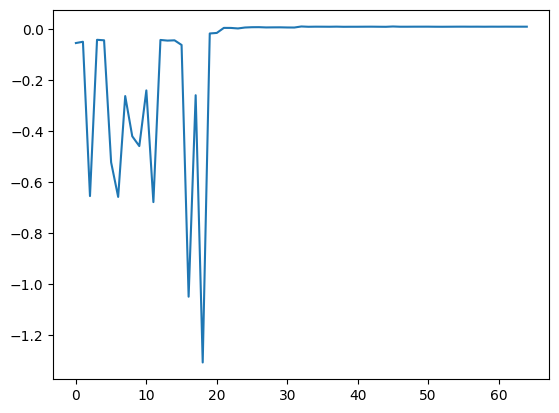

In [46]:
env = gym.make("BipedalWalker-v3") # , render_mode="human"
observation, info = env.reset(seed=27)
steps_per_episode = 500 # T
for episode in range(1000): # M

    action = [0, 0, 0, 0]
    rewards = 0
    step = 0
    while(step < steps_per_episode):
        action = agent.choose_action(observation, env.action_space)  # this is where you would insert your policy
        
        observation, reward, terminated, truncated, info = env.step(action)

        rewards += reward
        
        agent.update(observation, reward, terminated, truncated)
        if terminated or truncated:
            observation, info = env.reset()
            action = [0, 0, 0, 0]
        step += 1
        #env.render()
    if episode % 10 == 0:
        print(f"Episode: {episode}, Reward: {rewards}, Memory Size: {agent.memory.size}")
    plt.clf()
    plt.plot(np.array(scores) / steps_per_episode)
    plt.savefig("training.png")
    scores.append(rewards)
    
    observation, info = env.reset()
    action = [0, 0, 0, 0]
    #control.reset()
env.close()


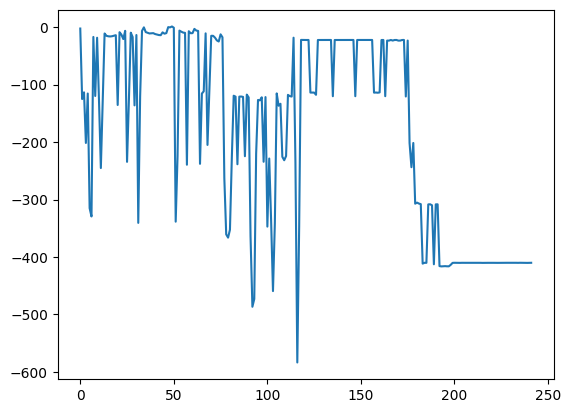

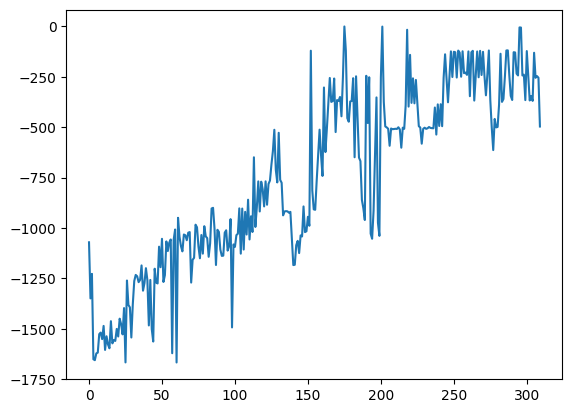

In [30]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(scores))], scores)
plt.show()